In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
#Droppiong the unnecessary column 
df.drop('Unnamed: 0',axis=1,inplace=True)
#Shape of the dataset
df.shape
(200, 4)
#Rename for simplicity
df.columns = ['TV', 'Radio', 'Newspaper', 'Sales']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
#Setting the color theme for visuals
def set_color_map(color_list):
    return mcolors.LinearSegmentedColormap.from_list("custom_colormap", color_list)

color_list = ["#e1eedb", "#b4d4a4", "#7fb466", "#64a444", "#1a6333", "#3b3b3b"]
cmap_custom = set_color_map(color_list)


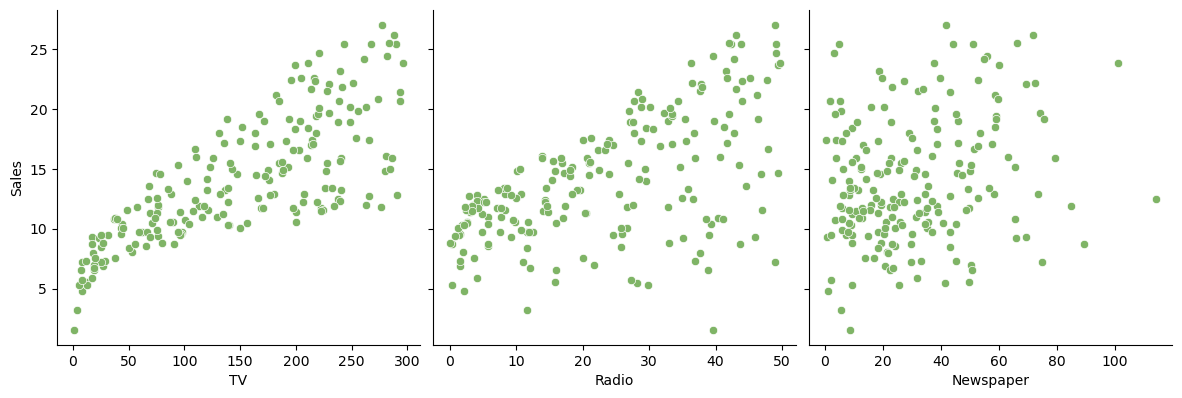

In [9]:
#Pairplot to visualize the relationships between variables
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter',palette=color_list[2], diag_kind=None, plot_kws={'color': color_list[2]})
plt.show()

The pairplot shows how advertising on TV, Radio, and in Newspapers is linked to sales.
TV ads seem to have a big impact on sales, showing a clear Positive relationship.
Radio ads also seem to affect sales in a positive way, but not as strongly as TV ads.
Newspaper ads dont seem to have much of an impact on sales, as the data points are randomly scattered.

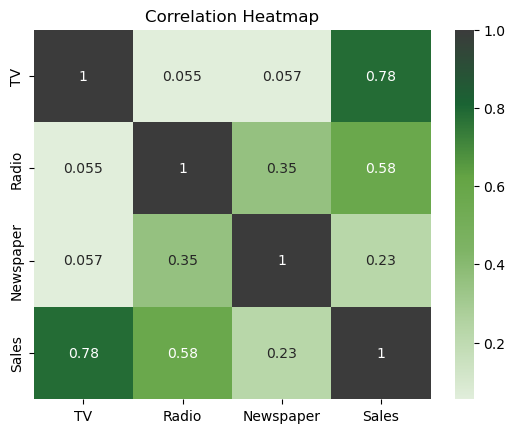

In [10]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap=cmap_custom)
plt.title('Correlation Heatmap')
plt.show()

In [11]:
X = df.drop('Sales', axis=1)
y = df['Sales']
#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [13]:
#Making predictions
linear_predictions = linear_model.predict(X_test)
#Evaluating the model
linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)

print('Mean Absolute Error (MAE):', linear_mae)
print('R-squared (R2):', linear_r2)

Mean Absolute Error (MAE): 1.5116692224549084
R-squared (R2): 0.8609466508230368


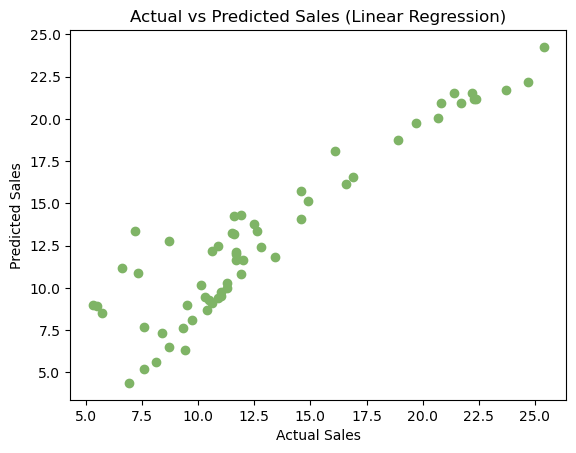

In [14]:
# Visualizing Linear Regression predictions
plt.scatter(y_test, linear_predictions, color=color_list[2])
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Linear Regression)')
plt.show()

This plot shows a strong positive linear curve between actual and predicted sales. However, to capture more complex, non-linear patterns in the data, we'll apply polynomial regression on top of linear regression.

In [15]:
#Transforming features to polynomial features
poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

In [16]:
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

LinearRegression()